# E-Commerce 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data Collection and Info Gathering

In [2]:
data=pd.read_csv("Data.csv")

In [3]:
data.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  
5  12-01-2010 08:26       7.65     17850.0  United Kingdom  
6  12-01-2010 08:26       4.25     17850.0  United Kingdom  
7  12-01-2010 08:28       1.85     17850.0  United Kingdom  
8  12-01-2010 08:28       1.85     17850.0  United Kingdom  
9  12-01-2010 08:34       1.69     13047.0  United Kingdom

In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Data Cleaning
# Finding missing values

In [7]:
missing_data_percentage=pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
missing_data_percentage.columns=['col_name','percentage']
missing_data_percentage

col_name  percentage
0    InvoiceNo    0.000000
1    StockCode    0.000000
2  Description    0.268311
3     Quantity    0.000000
4  InvoiceDate    0.000000
5    UnitPrice    0.000000
6   CustomerID   24.926694
7      Country    0.000000

Text(0, 0.5, 'percentage')

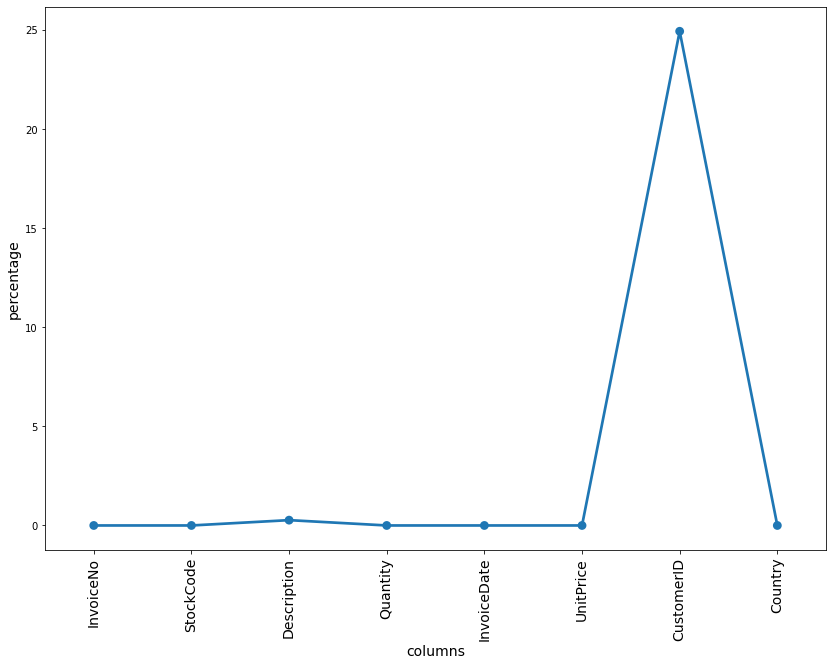

In [8]:
plt.figure(figsize=(14,10))
sns.pointplot(x='col_name',y='percentage',data=missing_data_percentage)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("columns",fontsize=14)
plt.ylabel("percentage",fontsize=14)

In [9]:
data[data['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
622     12-01-2010 11:52       0.00         NaN  United Kingdom  
1443    12-01-2010 14:32       2.51         NaN  United Kingdom  
1444    12-01-2010 14:32       2.51         NaN  United Kingdom  
1445    12-01-2010 14:32       0.85         NaN  United Kingdom  
1446    12-01-2010 14:32       1.66         NaN  United Kingdom  
...                  ...        ...         ...             ...  
541536  12-09-2011 10:26       4.13         NaN  United Kingdom  
541537  12-09-2011 10:26       4.13         NaN  United Kingdom  
541538  12-09-2011 10:26       4.96         NaN  United Kingdom  
541539  12-09-2011 10:26      10.79         NaN  United Kingdom  
541540  12-09-2011 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [10]:
data.loc[data['CustomerID'].isnull(),['UnitPrice','Quantity']].describe()

UnitPrice       Quantity
count  135080.000000  135080.000000
mean        8.076577       1.995573
std       151.900816      66.696153
min    -11062.060000   -9600.000000
25%         1.630000       1.000000
50%         3.290000       1.000000
75%         5.450000       3.000000
max     17836.460000    5568.000000

In [11]:
pd.set_option('display.max_rows',None)

In [12]:
data[data['Description'].isnull()]

InvoiceNo     StockCode Description  Quantity       InvoiceDate  \
622       536414         22139         NaN        56  12-01-2010 11:52   
1970      536545         21134         NaN         1  12-01-2010 14:32   
1971      536546         22145         NaN         1  12-01-2010 14:33   
1972      536547         37509         NaN         1  12-01-2010 14:33   
1987      536549        85226A         NaN         1  12-01-2010 14:34   
1988      536550         85044         NaN         1  12-01-2010 14:34   
2024      536552         20950         NaN         1  12-01-2010 14:34   
2025      536553         37461         NaN         3  12-01-2010 14:35   
2026      536554         84670         NaN        23  12-01-2010 14:35   
2406      536589         21777         NaN       -10  12-01-2010 16:50   
4347      536764        84952C         NaN       -38  12-02-2010 14:42   
4348      536765        84952C         NaN        19  12-02-2010 14:43   
7187      536995         35951         NaN        57  12-03-2010 15:29   
7188      536996         22712         NaN       -20  12-03-2010 15:30   
7189      536997         22028         NaN       -20  12-03-2010 15:30   
7190      536998         85067         NaN        -6  12-03-2010 15:30   
7191      536999         21421         NaN       110  12-03-2010 15:32   
7192      537000         21414         NaN       -22  12-03-2010 15:32   
7193      537001         21653         NaN        -6  12-03-2010 15:33   
7194      537002         21651         NaN        70  12-03-2010 15:33   
7195      537003         85126         NaN        -2  12-03-2010 15:33   
7196      537004         21814         NaN       -30  12-03-2010 15:34   
7197      537005         21692         NaN       -70  12-03-2010 15:35   
7198      537006         21648         NaN      -130  12-03-2010 15:36   
7199      537007         21172         NaN       -80  12-03-2010 15:36   
7200      537008         21161         NaN      -120  12-03-2010 15:37   
7201      537009        84534B         NaN       -80  12-03-2010 15:38   
7202      537010         22162         NaN       -40  12-03-2010 15:38   
7203      537011         22139         NaN        -5  12-03-2010 15:38   
7204      537012         21535         NaN       -12  12-03-2010 15:39   
7205      537013         35965         NaN       -25  12-03-2010 15:40   
7206      537014         21040         NaN       -20  12-03-2010 15:40   
7207      537015         37464         NaN       -14  12-03-2010 15:41   
7208      537016         21836         NaN       -15  12-03-2010 15:41   
7209      537017        47556B         NaN       -69  12-03-2010 15:41   
7210      537018        84562A         NaN        -3  12-03-2010 15:42   
7211      537019         37474         NaN       -15  12-03-2010 15:43   
7212      537020         21807         NaN       -30  12-03-2010 15:43   
7213      537021         21011         NaN       -20  12-03-2010 15:43   
7291      537027        18098C         NaN      -140  12-03-2010 16:36   
7292      537028         21696         NaN      -320  12-03-2010 16:36   
7293      537029         37476         NaN        -6  12-03-2010 16:37   
12008     537361         21777         NaN         5  12-06-2010 12:34   
12069     537363        84569B         NaN       -20  12-06-2010 12:35   
12070     537364         21027         NaN       -70  12-06-2010 12:36   
12934     537401        84898F         NaN       -24  12-06-2010 14:37   
13219     537427        84968B         NaN       -21  12-06-2010 15:37   
13263     537430         85215         NaN       120  12-06-2010 16:05   
13959     537436         84270         NaN         7  12-06-2010 17:00   
13960     537437         90167         NaN        10  12-06-2010 17:00   
13961     537438         22959         NaN        13  12-06-2010 17:00   
13962     537439         37474         NaN         1  12-06-2010 17:01   
14060     537449         21054         NaN       -30  12-07-2010 09:26   
14061     5

In [13]:
data1 = data.loc[(data.CustomerID.isnull()==False) & (data.Description.isnull()==False)].copy()

In [14]:
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
missing_data_percentage=pd.DataFrame(data1.isnull().sum()*100/data1.shape[0]).reset_index()
missing_data_percentage.columns=['col_name','percentage']
missing_data_percentage

col_name  percentage
0    InvoiceNo         0.0
1    StockCode         0.0
2  Description         0.0
3     Quantity         0.0
4  InvoiceDate         0.0
5    UnitPrice         0.0
6   CustomerID         0.0
7      Country         0.0

Text(0, 0.5, 'percentage')

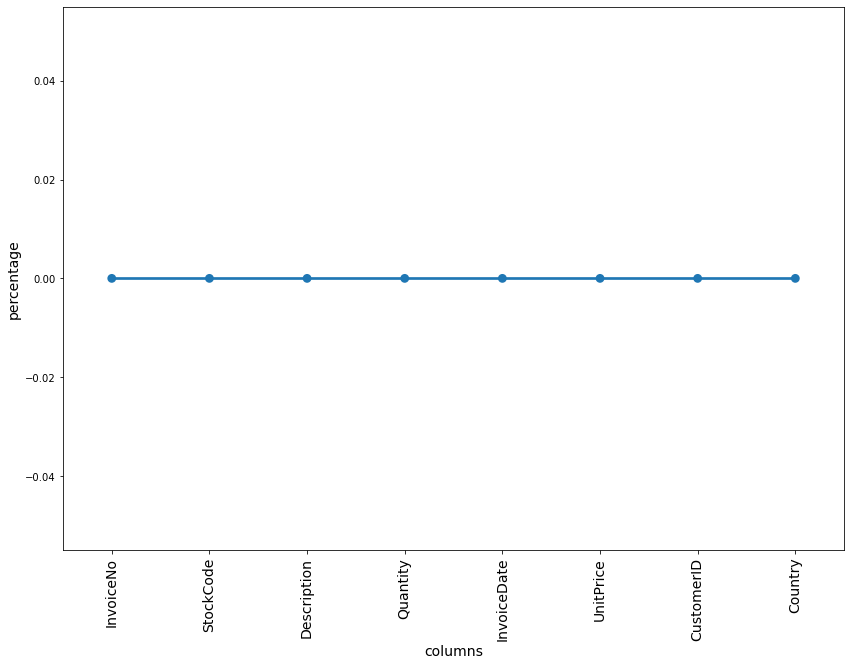

In [16]:
plt.figure(figsize=(14,10))
sns.pointplot(x='col_name',y='percentage',data=missing_data_percentage)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("columns",fontsize=14)
plt.ylabel("percentage",fontsize=14)

# Data Profiling

In [17]:
# invoice
data1['InvoiceNo'].describe()

count     406829
unique     22190
top       576339
freq         542
Name: InvoiceNo, dtype: object

In [18]:
data1['InvoiceNo'].nunique()

22190

In [19]:
# There is cancelled invoice aswell
data1['cancelled']=np.where(data1['InvoiceNo'].apply(lambda x:x[0]=='C'),True,False)


In [20]:
data1['cancelled'].value_counts()*100/data1.shape[0]

False    97.81112
True      2.18888
Name: cancelled, dtype: float64

In [21]:
data1.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  cancelled  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom      False  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom      False  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom      False  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom      False  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom      False

In [22]:
data1.loc[data1['cancelled']==True,['Quantity','UnitPrice']].describe()

Quantity     UnitPrice
count   8905.000000   8905.000000
mean     -30.859966     18.845519
std     1170.154939    444.366043
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

In [23]:
# stockcode
data['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [24]:
def count_digits(a):
    return sum(1 for i in a if i.isdigit())
data1["NumericStockCode"] = data.StockCode.apply(lambda a: count_digits(a))

In [25]:

data1["NumericStockCode"].value_counts()

5    404909
0      1786
1       134
Name: NumericStockCode, dtype: int64

In [26]:
data1.loc[data1["NumericStockCode"]<5].value_counts()

InvoiceNo  StockCode     Description                 Quantity  InvoiceDate       UnitPrice  CustomerID  Country               cancelled  NumericStockCode
572344     M             Manual                       48       10/24/2011 10:43  1.500      14607.0     United Kingdom        False      0                   6
536370     POST          POSTAGE                      3        12-01-2010 08:45  18.000     12583.0     France                False      0                   1
574442     POST          POSTAGE                      5        11-04-2011 11:40  40.000     12704.0     Finland               False      0                   1
574838     POST          POSTAGE                      5        11-07-2011 11:37  28.000     12484.0     Spain                 False      0                   1
574745     C2            CARRIAGE                     1        11-07-2011 08:26  50.000     14911.0     EIRE                  False      1                   1
574741     M             Manual                    

<AxesSubplot:xlabel='NumericStockCode', ylabel='count'>

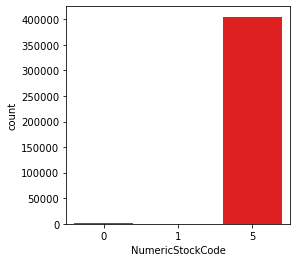

In [27]:
plt.figure(figsize=(4,4))
sns.countplot(x='NumericStockCode',data=data1,color="red")

In [28]:
data1.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  cancelled  \
0  12-01-2010 08:26       2.55     17850.0  United Kingdom      False   
1  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   
2  12-01-2010 08:26       2.75     17850.0  United Kingdom      False   
3  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   
4  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   

   NumericStockCode  
0                 5  
1                 5  
2                 5  
3                 5  
4                 5

In [29]:
data1.shape

(406829, 10)

In [30]:
data2=data1.loc[(data1['NumericStockCode']==5)].copy()

In [31]:
data2.shape

(404909, 10)

In [32]:
data2['StockCode'].describe()

count     404909
unique      3676
top       85123A
freq        2077
Name: StockCode, dtype: object

In [33]:
data2['StockCode'].value_counts()

85123A     2077
22423      1905
85099B     1662
84879      1418
47566      1416
20725      1359
22720      1232
20727      1126
22197      1118
23203      1115
22383      1103
21212      1080
23209      1040
23298      1036
22086      1029
22382      1021
20728      1012
22457       997
22469       996
22384       977
22960       974
21034       955
22727       932
23206       907
82482       905
22386       903
22993       902
22138       894
22666       890
22961       888
20726       861
23084       857
22699       854
22178       849
22139       849
82494L      836
22470       835
22726       831
20914       818
22411       814
21931       800
23202       788
23301       779
23201       775
20724       767
23245       764
22697       761
22077       757
21080       755
23355       747
23199       747
21790       740
22629       728
22910       725
21181       723
22112       721
21754       719
84946       716
21733       709
21175       708
84991       698
21977       692
22722   

In [34]:
stockcode_counts = data2.StockCode.value_counts().sort_values(ascending=False)

In [35]:
stockcode_counts

85123A     2077
22423      1905
85099B     1662
84879      1418
47566      1416
20725      1359
22720      1232
20727      1126
22197      1118
23203      1115
22383      1103
21212      1080
23209      1040
23298      1036
22086      1029
22382      1021
20728      1012
22457       997
22469       996
22384       977
22960       974
21034       955
22727       932
23206       907
82482       905
22386       903
22993       902
22138       894
22666       890
22961       888
20726       861
23084       857
22699       854
22178       849
22139       849
82494L      836
22470       835
22726       831
20914       818
22411       814
21931       800
23202       788
23301       779
23201       775
20724       767
23245       764
22697       761
22077       757
21080       755
23355       747
23199       747
21790       740
22629       728
22910       725
21181       723
22112       721
21754       719
84946       716
21733       709
21175       708
84991       698
21977       692
22722   

In [36]:
# top 10 highest StockCode 
aa=stockcode_counts.iloc[0:10]
aa

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
20727     1126
22197     1118
23203     1115
Name: StockCode, dtype: int64

Text(0.5, 0, 'Common StockCode')

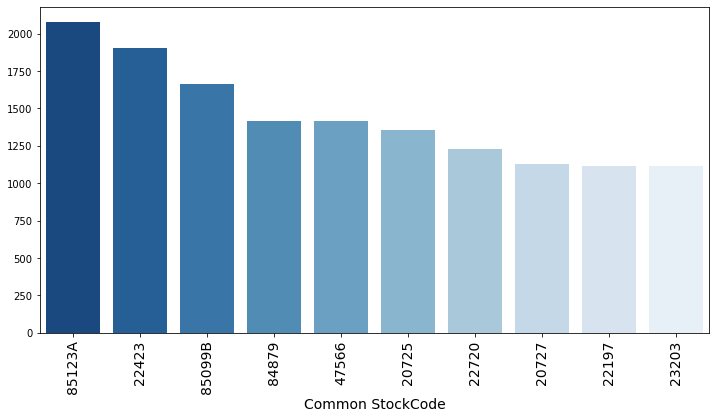

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=stockcode_counts.iloc[0:10].index, y=stockcode_counts.iloc[0:10].values, palette="Blues_r",data=data2)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Common StockCode",fontsize=14)

In [38]:
# Description
data2['Description'].describe()

count                                 404909
unique                                  3888
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2070
Name: Description, dtype: object

In [39]:
description_count=data2['Description'].value_counts().sort_values(ascending=False)

In [40]:
description_count

WHITE HANGING HEART T-LIGHT HOLDER     2070
REGENCY CAKESTAND 3 TIER               1905
JUMBO BAG RED RETROSPOT                1662
ASSORTED COLOUR BIRD ORNAMENT          1418
PARTY BUNTING                          1416
LUNCH BAG RED RETROSPOT                1358
SET OF 3 CAKE TINS PANTRY DESIGN       1232
LUNCH BAG  BLACK SKULL.                1126
PACK OF 72 RETROSPOT CAKE CASES        1080
SPOTTY BUNTING                         1029
PAPER CHAIN KIT 50'S CHRISTMAS         1029
LUNCH BAG SPACEBOY DESIGN              1021
LUNCH BAG CARS BLUE                    1012
NATURAL SLATE HEART CHALKBOARD          997
HEART OF WICKER SMALL                   996
LUNCH BAG PINK POLKADOT                 977
JAM MAKING SET WITH JARS                974
REX CASH+CARRY JUMBO SHOPPER            955
LUNCH BAG SUKI DESIGN                   950
ALARM CLOCK BAKELIKE RED                932
LUNCH BAG APPLE DESIGN                  907
WOODEN PICTURE FRAME WHITE FINISH       905
JUMBO BAG PINK POLKADOT         

In [41]:
# top 10 description
bb=description_count.iloc[0:20]
bb

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
SPOTTY BUNTING                        1029
PAPER CHAIN KIT 50'S CHRISTMAS        1029
LUNCH BAG SPACEBOY DESIGN             1021
LUNCH BAG CARS BLUE                   1012
NATURAL SLATE HEART CHALKBOARD         997
HEART OF WICKER SMALL                  996
LUNCH BAG PINK POLKADOT                977
JAM MAKING SET WITH JARS               974
REX CASH+CARRY JUMBO SHOPPER           955
LUNCH BAG SUKI DESIGN                  950
ALARM CLOCK BAKELIKE RED               932
Name: Description, dtype: int64

Text(0.5, 0, 'Description')

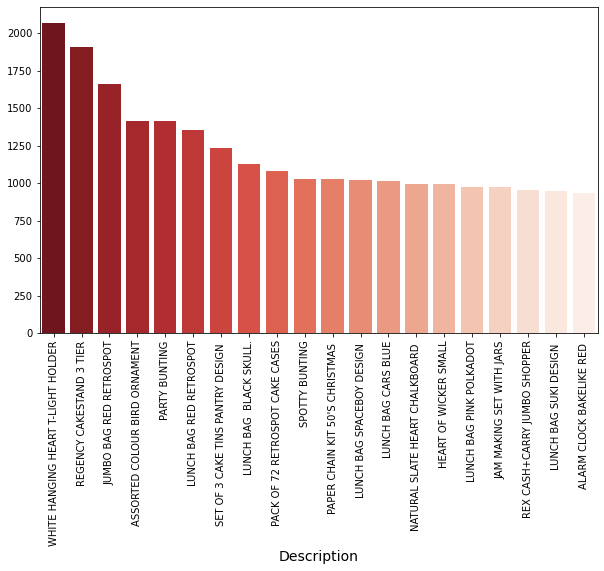

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=description_count.iloc[0:20].index,y=description_count.iloc[0:20].values,data=data2, palette="Reds_r")
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Description",fontsize=14)

In [43]:
data2['StockCode'].nunique()

3676

In [44]:
data2['Description'].nunique()

3888

In [45]:
data2.groupby(data2['StockCode']).count().reset_index() # to see the unique count of stockcode, same as stockcode.unique()

StockCode  InvoiceNo  Description  Quantity  InvoiceDate  UnitPrice  \
0        10002         49           49        49           49         49   
1        10080         21           21        21           21         21   
2        10120         30           30        30           30         30   
3       10123C          3            3         3            3          3   
4       10124A          5            5         5            5          5   
5       10124G          4            4         4            4          4   
6        10125         64           64        64           64         64   
7        10133        125          125       125          125        125   
8        10135        122          122       122          122        122   
9        11001         69           69        69           69         69   
10       15030         13           13        13           13         13   
11       15034         95           95        95           95         95   
12       15036        329          329       329          329        329   
13       15039         74           74        74           74         74   
14      15044A         80           80        80           80         80   
15      15044B         49           49        49           49         49   
16      15044C         63           63        63           63         63   
17      15044D         76           76        76           76         76   
18     15056BL        296          296       296          296        296   
19      15056N        388          388       388          388        388   
20      15056P        141          141       141          141        141   
21      15058A         55           55        55           55         55   
22      15058B         43           43        43           43         43   
23      15058C         30           30        30           30         30   
24      15060B         96           96        96           96         96   
25       16008         70           70        70           70         70   
26       16010          3            3         3            3          3   
27       16011         47           47        47           47         47   
28       16012         37           37        37           37         37   
29       16014         54           54        54           54         54   
30       16015         24           24        24           24         24   
31       16016         65           65        65           65         65   
32      16020C          2            2         2            2          2   
33       16033          4            4         4            4          4   
34       16043          2            2         2            2          2   
35       16045         69           69        69           69         69   
36       16046         16           16        16           16         16   
37       16048         49           49        49           49         49   
38       16049          5            5         5            5          5   
39       16052          6            6         6            6          6   
40       16054         34           34        34           34         34   
41      16151A          3            3         3            3          3   
42      16156L         18           18        18           18         18   
43      16156S        167          167       167          167        167   
44      16161G         22           22        22           22         22   
45      16161M          1            1         1            1          1   
46      16161P        250          250       250          250        250   
47      16161U        135          135       135          135        135   
48      16162L          6            6         6            6          6   
49      16162M          7            7         7            7          7   
50      16168M         20           20        20           20         20   
51      16169E        152          152       152     

In [46]:
data2.groupby(data2['StockCode']).Description.nunique().sort_values(ascending=False)

StockCode
23196      4
23236      4
23370      3
23209      3
23396      3
22937      3
23413      3
17107D     3
22776      3
23126      3
23244      3
23131      3
23240      3
23231      3
23535      3
23366      3
23203      3
22179      2
20725      2
23188      2
23271      2
20914      2
23280      2
23281      2
23282      2
23283      2
23292      2
23298      2
23299      2
22246      2
23306      2
90014C     2
23254      2
71053      2
23169      2
90014B     2
90014A     2
23324      2
23325      2
22268      2
44235      2
23342      2
22285      2
22286      2
22287      2
23256      2
23253      2
23205      2
23252      2
23212      2
23214      2
22813      2
22812      2
21818      2
22804      2
23229      2
23232      2
21811      2
23235      2
22837      2
23237      2
22197      2
23197      2
22199      2
22785      2
23194      2
23191      2
23359      2
23250      2
23251      2
22847      2
22778      2
22777      2
22849      2
23249      2
23028      2
23

In [47]:
# we can see with unique stockcode there are more than one description. lets see
data2.loc[data2['StockCode']=='23196']

InvoiceNo StockCode                         Description  Quantity  \
237422    557858     23196       RETRO LEAVES MAGNETIC NOTEPAD         1   
237432    557858     23196       RETRO LEAVES MAGNETIC NOTEPAD         1   
238784    557956     23196       RETRO LEAVES MAGNETIC NOTEPAD         1   
238918    557960     23196       RETRO LEAVES MAGNETIC NOTEPAD         2   
238991    557962     23196  RETO LEAVES MAGNETIC SHOPPING LIST        12   
240155    558087     23196       RETRO LEAVES MAGNETIC NOTEPAD         3   
240477    558102     23196       RETRO LEAVES MAGNETIC NOTEPAD         2   
240620    558105     23196       RETRO LEAVES MAGNETIC NOTEPAD         2   
241229    558195     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
241521    558232     23196       RETRO LEAVES MAGNETIC NOTEPAD         1   
241612    558237     23196       RETRO LEAVES MAGNETIC NOTEPAD         6   
241671    558237     23196       RETRO LEAVES MAGNETIC NOTEPAD         4   
243380    558455     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
243532    558467     23196       RETRO LEAVES MAGNETIC NOTEPAD         2   
243535    558467     23196       RETRO LEAVES MAGNETIC NOTEPAD         1   
246548    558705     23196       RETRO LEAVES MAGNETIC NOTEPAD         2   
246802    558731     23196      LEAVES MAGNETIC  SHOPPING LIST        12   
249168    558888     23196       RETRO LEAVES MAGNETIC NOTEPAD         4   
252106    559064     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
252851    559141     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
254100    559293     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
256109    559455     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
257540    559535     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
258467    559653     23196       VINTAGE LEAF MAGNETIC NOTEPAD         2   
263433    559989     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
263461    559990     23196      LEAVES MAGNETIC  SHOPPING LIST        12   
263649    560025     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
264570    560104     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
266123    560244     23196       VINTAGE LEAF MAGNETIC NOTEPAD         3   
266331    560251     23196       VINTAGE LEAF MAGNETIC NOTEPAD         5   
266622    560260     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
270122    560547     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
270798    560590     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
271025    560606     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
271058    560635     23196       RETRO LEAVES MAGNETIC NOTEPAD        12   
271508    560698     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
271670    560712     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
271702    560714     23196       VINTAGE LEAF MAGNETIC NOTEPAD         1   
271950    560725     23196  RETO LEAVES MAGNETIC SHOPPING LIST        12   
272124    560732     23196       VINTAGE LEAF MAGNETIC NOTEPAD         3   
273651    560853     23196       VINTAGE LEAF MAGNETIC NOTEPAD         2   
274262    560894     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
274446    560916     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
276404    561043     23196       VINTAGE LEAF MAGNETIC NOTEPAD         3   
276832    561078     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
277681    561147     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
278068    561208     23196       VINTAGE LEAF MAGNETIC NOTEPAD        48   
278926    561219     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
280263    561388     23196       VINTAGE LEAF MAGNETIC NOTEPAD        48   
280787    561502     23196       VINTAGE LEAF MAGNETIC NOTEPAD        12   
281794    561600     23196       VINTAGE LEAF MAGNETIC NOTEPAD         4   
282712    561656     23196       VINTAGE LEAF MAGNETIC 

In [48]:
# Customer Id
data2['CustomerID'].describe()

count    404909.000000
mean      15295.168304
std        1710.424057
min       12346.000000
25%       13969.000000
50%       15159.000000
75%       16794.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [49]:
data2['CustomerID'].nunique()

4363

In [50]:
# top 10 common customers 
cus_count=data2['CustomerID'].value_counts().sort_values(ascending=False)
cus_count

17841.0    7971
14911.0    5813
14096.0    5095
12748.0    4623
14606.0    2778
15311.0    2491
14646.0    2066
13089.0    1857
13263.0    1672
14298.0    1640
15039.0    1508
14156.0    1406
18118.0    1283
14159.0    1211
14796.0    1164
15005.0    1159
16033.0    1152
14056.0    1127
14769.0    1093
17511.0    1074
13081.0    1060
16549.0     981
14527.0     974
14456.0     974
15719.0     937
15555.0     922
16931.0     898
17811.0     871
14505.0     803
12415.0     776
18283.0     754
17338.0     754
12921.0     741
17757.0     741
17675.0     721
15159.0     720
16764.0     718
16904.0     708
13137.0     704
15547.0     702
16923.0     696
17920.0     695
17735.0     690
15529.0     673
16360.0     671
16729.0     666
16241.0     662
15856.0     652
13969.0     633
16713.0     632
14502.0     630
12681.0     623
13230.0     612
14415.0     612
13098.0     605
14194.0     604
14088.0     590
16686.0     588
13694.0     582
17611.0     582
14667.0     575
17238.0     566
17602.0 

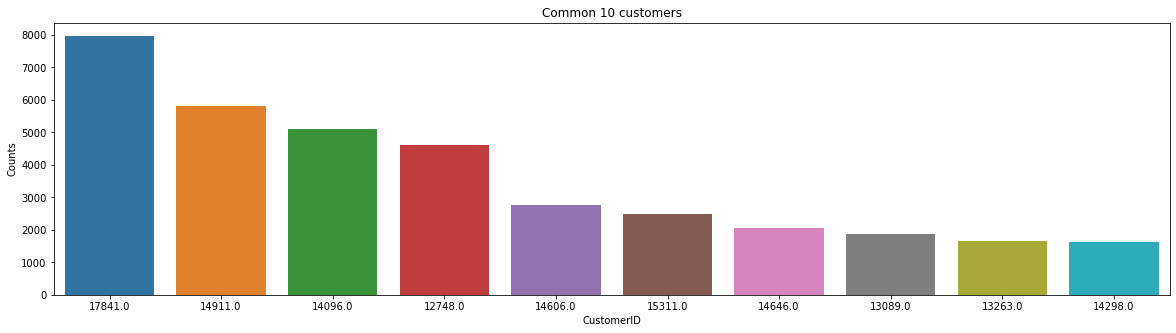

In [51]:
cus_counts = data2.CustomerID.value_counts().sort_values(ascending=False).iloc[0:10] 
plt.figure(figsize=(20,5))
sns.barplot(x=cus_counts.index,y=cus_counts.values, order=cus_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Common 10 customers");

In [52]:
# countries
data2.Country.describe()

count             404909
unique                37
top       United Kingdom
freq              361255
Name: Country, dtype: object

In [53]:
data2.Country.value_counts()

United Kingdom          361255
Germany                   9096
France                    8168
EIRE                      7380
Spain                     2468
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1436
Australia                 1257
Norway                    1060
Italy                      783
Channel Islands            753
Finland                    653
Cyprus                     619
Sweden                     437
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     250
Unspecified                244
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45
Lithuani

In [54]:
country_count=data2.Country.value_counts().sort_values(ascending=False).iloc[0:10]
country_count

United Kingdom    361255
Germany             9096
France              8168
EIRE                7380
Spain               2468
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1436
Australia           1257
Name: Country, dtype: int64

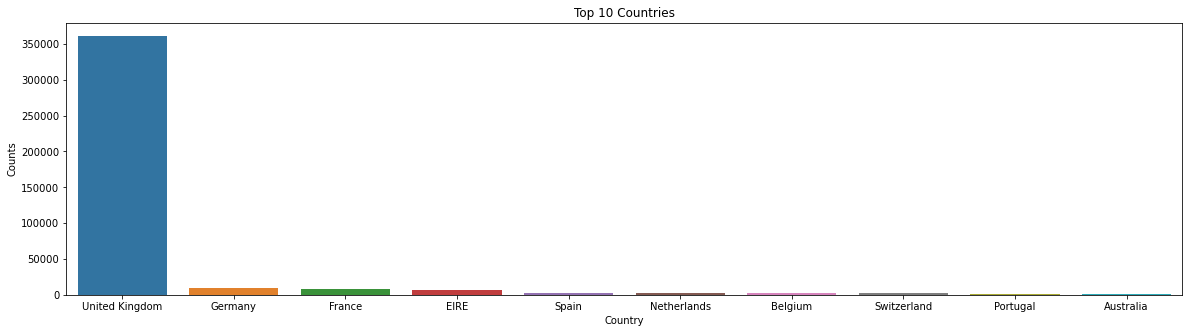

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(x=country_count.index,y=country_count.values,data=data2)
plt.ylabel("Counts")
plt.xlabel("Country")
plt.title("Top 10 Countries");
#plt.yscale("log")

In [56]:
# Unit Price
data2['UnitPrice'].describe()

count    404909.000000
mean          2.901129
std           4.430846
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [57]:
data2['UnitPrice'].nunique()

373

In [58]:
data2['UnitPrice'].value_counts()

1.25      46531
1.65      37493
2.95      27205
0.85      26376
0.42      22017
4.95      18648
3.75      18087
2.10      17465
2.08      15945
1.45      12899
1.95      12898
2.55      12823
0.39       8169
5.95       7801
0.65       7744
0.55       7514
4.25       7353
7.95       6993
0.83       5987
4.15       5757
9.95       5756
8.50       5686
0.29       4388
1.69       4257
12.75      3744
8.25       3724
3.95       2846
2.89       2707
6.75       2428
0.79       2179
3.25       2151
0.19       1883
1.06       1552
0.95       1417
6.25       1347
16.95      1255
2.49       1251
6.95       1249
0.72       1235
1.79       1229
14.95      1135
0.21       1128
2.25       1073
3.29       1064
12.50      1047
2.46       1010
5.45       1008
10.95       993
3.39        883
8.95        837
4.65        829
1.49        792
5.75        758
1.85        752
1.63        688
0.12        637
7.50        630
0.75        593
7.65        536
4.13        533
0.36        496
6.35        436
5.79    

In [59]:
data2.loc[data2['UnitPrice']==0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

             InvoiceDate  UnitPrice  CustomerID         Country  cancelled  \
9302    12-05-2010 14:02        0.0     12647.0         Germany      False   
33576   12/16/2010 14:36        0.0     16560.0  United Kingdom      False   
40089   12/21/2010 13:45        0.0     14911.0            EIRE      False   
47068   01-06-2011 16:41        0.0     13081.0  United Kingdom      False   
47070   01-06-2011 16:41        0.0     13081.0  United Kingdom      False   
56674    1/13/2011 15:10        0.0     15107.0  United Kingdom      False   
86789   02-10-2011 13:08        0.0     17560.0  United Kingdom      False   
130188   3/23/2011 10:25        0.0     13239.0  United Kingdom      False   
139453   3/30/2011 12:45        0.0     13113.0  United Kingdom      False   
145208  04-04-2011 14:42        0.0     14410.0  United Kingdom      False   
157042   4/14/2011 18:57        0.0     12457.0     Switzerland      False   
187613  05-12-2011 15:21        0.0     17667.0  United Kingdom      False   
198383   5/20/2011 14:13        0.0     12415.0       Australia      False   
279324   7/26/2011 12:24        0.0     16818.0  United Kingdom      False   
282912   7/28/2011 17:09        0.0     12507.0           Spain      False   
298054  08-11-2011 11:42        0.0     14911.0            EIRE      False   
314745   8/26/2011 14:19        0.0     14646.0     Netherland

In [60]:

a=data2['UnitPrice']==0


In [61]:
data3=data2.loc[a==False].copy()

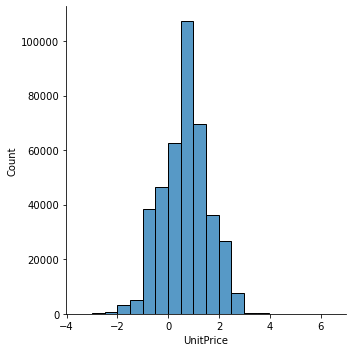

In [62]:
sns.displot(np.log(data3.UnitPrice), bins=20, kde=False)


In [63]:
np.exp(-2)

0.1353352832366127

In [64]:
np.exp(3)

20.085536923187668

In [65]:
print( np.quantile(data3.UnitPrice, .95))

8.5


In [66]:
# Quantity(Target)
data3['Quantity'].describe()


count    404876.000000
mean         12.072511
std         248.467980
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

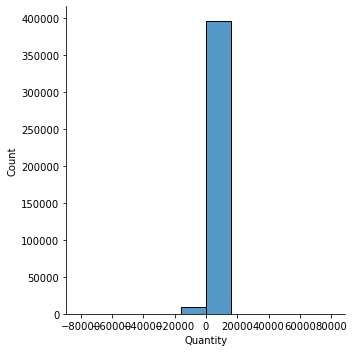

In [67]:
sns.displot(data3['Quantity'],bins=10,kde=False)

C:\Users\Shail\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


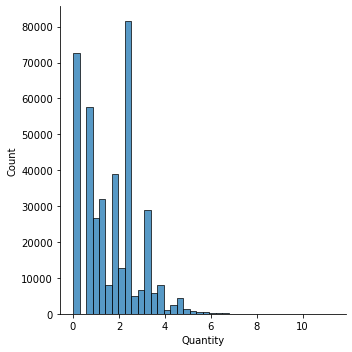

In [68]:
sns.displot(np.log(data3['Quantity']),bins=40,kde=False)

In [69]:
np.exp(0)

1.0

In [70]:
np.exp(4)

54.598150033144236

In [71]:
print("Q3 quantile of arr : ", np.quantile(data3.Quantity, .75))

Q3 quantile of arr :  12.0


In [72]:
print("Q3 quantile of arr : ", np.quantile(data3.Quantity, .95))

Q3 quantile of arr :  36.0


In [73]:
# InvoiceDate
#slit column invoicedate into date and time
data3[['Date','Time']]=data3.InvoiceDate.str.split(expand=True)

In [74]:
data3.head(4)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   

        InvoiceDate  UnitPrice  CustomerID         Country  cancelled  \
0  12-01-2010 08:26       2.55     17850.0  United Kingdom      False   
1  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   
2  12-01-2010 08:26       2.75     17850.0  United Kingdom      False   
3  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   

   NumericStockCode        Date   Time  
0                 5  12-01-2010  08:26  
1                 5  12-01-2010  08:26  
2                 5  12-01-2010  08:26  
3                 5  12-01-2010  08:26

In [75]:
# convert date datatype object into datetime datatype
data3["Date"]= pd.to_datetime(data3["Date"])


In [76]:
# convert time datatype object into datetime datatype
data3["Time"]= pd.to_datetime(data3["Time"])

In [77]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404876 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         404876 non-null  object        
 1   StockCode         404876 non-null  object        
 2   Description       404876 non-null  object        
 3   Quantity          404876 non-null  int64         
 4   InvoiceDate       404876 non-null  object        
 5   UnitPrice         404876 non-null  float64       
 6   CustomerID        404876 non-null  float64       
 7   Country           404876 non-null  object        
 8   cancelled         404876 non-null  bool          
 9   NumericStockCode  404876 non-null  int64         
 10  Date              404876 non-null  datetime64[ns]
 11  Time              404876 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 37.5+ MB


In [78]:

# we can calculate revenue from unit price and quantity
data3['Revenue']=data3['Quantity']*data3['UnitPrice']



In [79]:
data3['year']=data3.Date.dt.year

In [80]:
data3['month']=data3.Date.dt.month

In [81]:
data3['day']=data3.Date.dt.day

In [82]:
data3['quarter']=data3.Date.dt.quarter

In [83]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404876 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         404876 non-null  object        
 1   StockCode         404876 non-null  object        
 2   Description       404876 non-null  object        
 3   Quantity          404876 non-null  int64         
 4   InvoiceDate       404876 non-null  object        
 5   UnitPrice         404876 non-null  float64       
 6   CustomerID        404876 non-null  float64       
 7   Country           404876 non-null  object        
 8   cancelled         404876 non-null  bool          
 9   NumericStockCode  404876 non-null  int64         
 10  Date              404876 non-null  datetime64[ns]
 11  Time              404876 non-null  datetime64[ns]
 12  Revenue           404876 non-null  float64       
 13  year              404876 non-null  int64         
 14  mont

In [84]:
# quantity sales for each year
date_info=data3.groupby(['year'])['Quantity'].sum()
date_info

year
2010     295940
2011    4591930
Name: Quantity, dtype: int64

In [85]:
quantity_info=pd.DataFrame(date_info).reset_index()
quantity_info

year  Quantity
0  2010    295940
1  2011   4591930

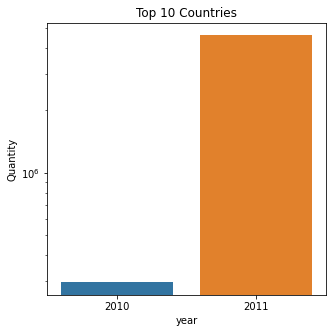

In [86]:
plt.figure(figsize=(5,5))
sns.barplot(x=quantity_info['year'],y=quantity_info['Quantity'],data=quantity_info)
plt.ylabel("Quantity")
plt.xlabel("year")
plt.title("Top 10 Countries");
plt.yscale("log")

In [87]:
date_info1=data3.groupby(['year'])['Revenue'].sum()
date_info1

year
2010    5.501251e+05
2011    7.736538e+06
Name: Revenue, dtype: float64

In [88]:
revenue_info=pd.DataFrame(date_info1).reset_index()
revenue_info

year       Revenue
0  2010  5.501251e+05
1  2011  7.736538e+06

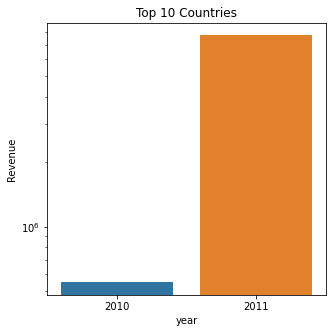

In [89]:
plt.figure(figsize=(5,5))
sns.barplot(x=revenue_info['year'],y=revenue_info['Revenue'],data=revenue_info)
plt.ylabel("Revenue")
plt.xlabel("year")
plt.title("Top 10 Countries");
plt.yscale("log")

In [90]:
data3.describe()

Quantity      UnitPrice     CustomerID  NumericStockCode  \
count  404876.000000  404876.000000  404876.000000          404876.0   
mean       12.072511       2.901366   15295.253282               5.0   
std       248.467980       4.430949    1710.404209               0.0   
min    -80995.000000       0.030000   12346.000000               5.0   
25%         2.000000       1.250000   13969.000000               5.0   
50%         5.000000       1.950000   15159.000000               5.0   
75%        12.000000       3.750000   16794.000000               5.0   
max     80995.000000     649.500000   18287.000000               5.0   

             Revenue           year          month            day  \
count  404876.000000  404876.000000  404876.000000  404876.000000   
mean       20.467164    2010.933977       7.606880      15.034499   
std       422.793171       0.248322       3.418957       8.653683   
min   -168469.600000    2010.000000       1.000000       1.000000   
25%         4.200000    2011.000000       5.000000       7.000000   
50%        10.900000    2011.000000       8.000000      15.000000   
75%        19.500000    2011.000000      11.000000      22.000000   
max    168469.600000    2011.000000      12.000000      31.000000   

             quarter  
count  404876.000000  
mean        2.854467  
std         1.122342  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max         4.000000

In [91]:
final_data=data3.copy()

In [92]:
final_data=final_data.drop(['NumericStockCode'],axis=1)

<AxesSubplot:>

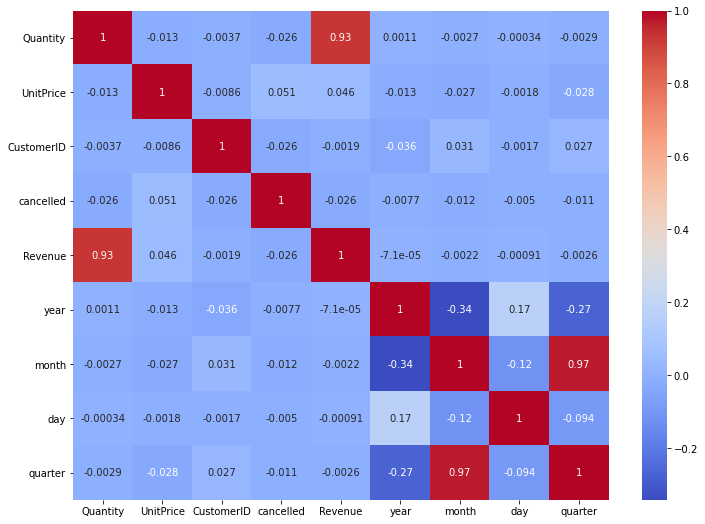

In [93]:
plt.figure(figsize=(12,9))
sns.heatmap(final_data.corr(),annot=True, cmap = 'coolwarm')

In [94]:
# Relationship between revenue and quantity

In [95]:
final_data.loc[final_data['cancelled']==True,['Quantity']].describe()

Quantity
count   8539.000000
mean     -31.559199
std     1194.817005
min   -80995.000000
25%       -6.000000
50%       -2.000000
75%       -1.000000
max       -1.000000

In [96]:
final_data=final_data.loc[final_data['cancelled']==False].copy()

In [97]:
final_data.shape

(396337, 16)

In [98]:
final_data.loc[final_data['cancelled']==True,['Quantity']].describe()

Quantity
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

<AxesSubplot:xlabel='Quantity', ylabel='Revenue'>

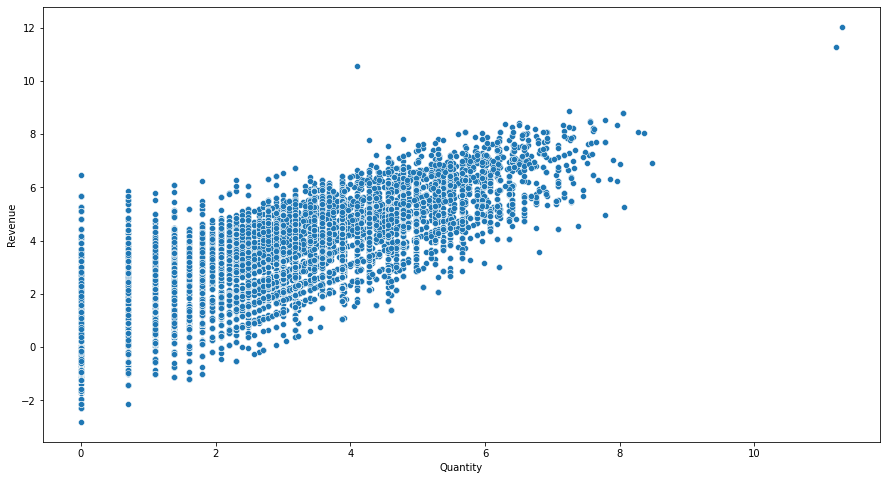

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=np.log(final_data.Quantity),y=np.log(final_data.Revenue),data=final_data)


In [100]:
final_data.loc[:,['Quantity','Revenue']].describe()

Quantity        Revenue
count  396337.000000  396337.000000
mean       13.012547      22.105094
std       179.641245     308.899121
min         1.000000       0.060000
25%         2.000000       4.680000
50%         6.000000      11.800000
75%        12.000000      19.800000
max     80995.000000  168469.600000

<AxesSubplot:>

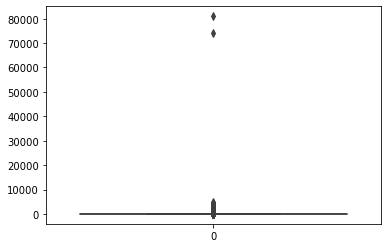

In [101]:
sns.boxplot(data=final_data['Quantity'])

In [102]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.01,0.99])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [103]:
low_quan, upp_quan = remove_outlier(final_data['Quantity'])
#                                  condn                            true      false(which r not outlier)
final_data['Quantity'] = np.where(final_data['Quantity']>upp_quan, upp_quan, final_data['Quantity'])
final_data['Quantity'] = np.where(final_data['Quantity']<low_quan, low_quan, final_data['Quantity'])

<AxesSubplot:>

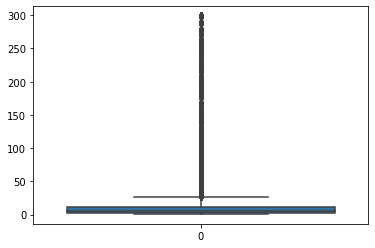

In [104]:
sns.boxplot(data=final_data['Quantity'])

In [105]:
final_data.shape

(396337, 16)

In [106]:
final_data.Quantity.describe()

count    396337.000000
mean         11.859156
std          25.538907
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         298.500000
Name: Quantity, dtype: float64

<AxesSubplot:>

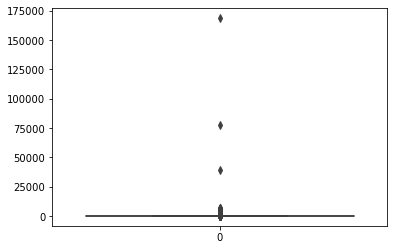

In [107]:
sns.boxplot(data=final_data['Revenue'])

In [108]:
low_rev, upp_rev=remove_outlier(final_data['Revenue'])

final_data['Revenue']=np.where(final_data['Revenue']>upp_rev,upp_rev, final_data['Revenue'])
final_data['Revenue']=np.where(final_data['Revenue']<low_rev,low_rev, final_data['Revenue'])

In [109]:
final_data['Revenue'].describe()

count    396337.000000
mean         20.125939
std          40.482922
min           0.060000
25%           4.680000
50%          11.800000
75%          19.800000
max         498.375000
Name: Revenue, dtype: float64

<AxesSubplot:>

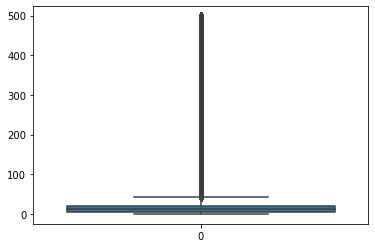

In [110]:
sns.boxplot(data=final_data['Revenue'])

Text(0.5, 0, 'quantity of items sale')

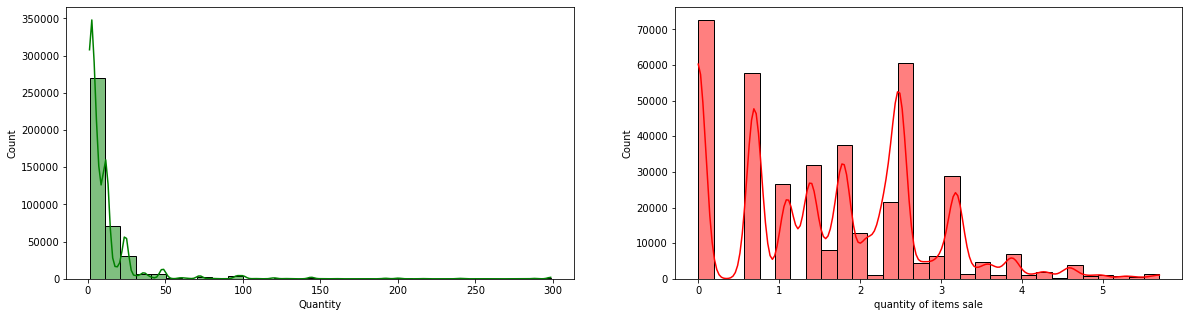

In [111]:

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(x=final_data.Quantity, kde=True,  color="Green", bins=30,ax=ax[0]);
sns.histplot(x=np.log(final_data.Quantity.values), kde=True, ax=ax[1], color="red", bins=30)
plt.xlabel("quantity of items sale")

In [112]:
np.exp(0.0)

1.0

In [113]:
np.exp(2.5)

12.182493960703473

In [114]:
np.exp(3.0)

20.085536923187668

In [115]:
final_data.to_csv("ecom_csv")

In [116]:
final_data.head(4)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   

        InvoiceDate  UnitPrice  CustomerID         Country  cancelled  \
0  12-01-2010 08:26       2.55     17850.0  United Kingdom      False   
1  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   
2  12-01-2010 08:26       2.75     17850.0  United Kingdom      False   
3  12-01-2010 08:26       3.39     17850.0  United Kingdom      False   

        Date                Time  Revenue  year  month  day  quarter  
0 2010-12-01 2021-11-24 08:26:00    15.30  2010     12    1        4  
1 2010-12-01 2021-11-24 08:26:00    20.34  2010     12    1        4  
2 2010-12-01 2021-11-24 08:26:00    22.00  2010     12    1        4  
3 2010-12-01 2021-11-24 08:26:00    20.34  2010     12    1        4

In [117]:
max(final_data['Revenue'])


498.375

In [118]:
min(final_data['Revenue'])

0.06